# MLP 이용한 분류

In [1]:
from tensorflow.python.keras.models import *
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.utils import *
from tensorflow.python.keras import *
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import *

## 전체곡에서 분류

In [24]:
import pandas as pd
import numpy as np
cluster = pd.read_csv('C:/Users/wnduq/Desktop/label.csv',encoding = 'euc-kr', index_col = 'Unnamed: 0')

In [25]:
data = pd.read_csv('./data_male_full.csv',encoding = 'euc-kr',index_col = 'Unnamed: 0')
singer = data['0.1']
label = []
for i in singer:
    for j in cluster['0']:
        if i == j:
            val = list(cluster[cluster['0']==j]['1'])
            label.append(val[0])
label = np.array(label)

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data.iloc[:,:20])
data = scale.transform(data.iloc[:,:20])

In [27]:
LE = LabelEncoder()
y_label = to_categorical(LE.fit_transform(label))

In [28]:
X = data
x_train, x_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3, random_state = 42)

In [7]:
#모델
backend.clear_session()
model = Sequential()
model.add(Dense(20, input_shape=(20,), activation = 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(5,activation = 'softmax'))
#학습
adam = optimizers.Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])
model.fit(x_train,y_train,batch_size = 50, epochs = 300, validation_split = 0.1)

Train on 151 samples, validate on 17 samples
Epoch 1/300
151/151 [==============================] - 2s 14ms/step - loss: 1.8931 - acc: 0.2185 - val_loss: 1.7993 - val_acc: 0.1176
Epoch 2/300
151/151 [==============================] - 0s 236us/step - loss: 1.6225 - acc: 0.3179 - val_loss: 1.5731 - val_acc: 0.4118
Epoch 3/300
151/151 [==============================] - 0s 218us/step - loss: 1.4682 - acc: 0.3576 - val_loss: 1.4556 - val_acc: 0.3529
Epoch 4/300
151/151 [==============================] - 0s 225us/step - loss: 1.3251 - acc: 0.4437 - val_loss: 1.3997 - val_acc: 0.2941
Epoch 5/300
151/151 [==============================] - 0s 258us/step - loss: 1.2473 - acc: 0.5364 - val_loss: 1.3691 - val_acc: 0.3529
Epoch 6/300
151/151 [==============================] - 0s 225us/step - loss: 1.2035 - acc: 0.5762 - val_loss: 1.3417 - val_acc: 0.4118
Epoch 7/300
151/151 [==============================] - 0s 238us/step - loss: 1.2011 - acc: 0.5695 - val_loss: 1.3129 - val_acc: 0.3529
Epoch 8/300

In [8]:
results = model.evaluate(x_test, y_test)
print('testset 정확도 : ' + str(results[1]))

72/72 [==============================] - 0s 208us/step
testset 정확도 : 0.5833333333333334


## 30초 데이터

In [29]:
data = pd.read_csv('./data_male_full_30sec.csv',encoding = 'euc-kr',index_col = 'Unnamed: 0')
singer = data['0.1']
label = []
for i in singer:
    for j in cluster['0']:
        if i == j:
            val = list(cluster[cluster['0']==j]['1'])
            label.append(val[0])
label = np.array(label)

In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data.iloc[:,:20])
data = scale.transform(data.iloc[:,:20])

In [31]:
LE = LabelEncoder()
y_label = to_categorical(LE.fit_transform(label))

In [32]:
X = data
x_train, x_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3, random_state = 42)

In [33]:
x_train.shape

(672, 20)

In [35]:
#모델
backend.clear_session()
model = Sequential()
model.add(Dense(20, input_shape=(20,), activation = 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(5,activation = 'softmax'))
#학습
adam = optimizers.Adam(lr = 0.01)
checkpointer = ModelCheckpoint(filepath='./save_models/best_MLP.hdf5')
model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])
hist_mlp = model.fit(x_train,y_train,batch_size = 30, epochs = 50, validation_split = 0.1,
                                                         callbacks=[checkpointer], verbose=1)

Train on 604 samples, validate on 68 samples
Epoch 1/50
604/604 [==============================] - 1s 949us/step - loss: 1.5529 - acc: 0.3907 - val_loss: 1.3147 - val_acc: 0.4118
Epoch 2/50
604/604 [==============================] - 0s 304us/step - loss: 1.2353 - acc: 0.5232 - val_loss: 1.1692 - val_acc: 0.5000
Epoch 3/50
604/604 [==============================] - 0s 308us/step - loss: 1.1124 - acc: 0.5728 - val_loss: 1.0874 - val_acc: 0.5294
Epoch 4/50
604/604 [==============================] - 0s 291us/step - loss: 1.0411 - acc: 0.5894 - val_loss: 0.9947 - val_acc: 0.6176
Epoch 5/50
604/604 [==============================] - 0s 298us/step - loss: 0.9898 - acc: 0.6175 - val_loss: 0.9672 - val_acc: 0.5735
Epoch 6/50
604/604 [==============================] - 0s 323us/step - loss: 0.8962 - acc: 0.6424 - val_loss: 0.9327 - val_acc: 0.5882
Epoch 7/50
604/604 [==============================] - 0s 235us/step - loss: 0.8444 - acc: 0.6523 - val_loss: 0.9070 - val_acc: 0.6618
Epoch 8/50
604/60

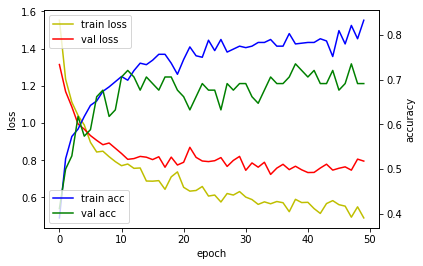

In [44]:
import matplotlib.pyplot as plt

fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_mlp.history['loss'],'y',label='train loss')
loss_ax.plot(hist_mlp.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist_mlp.history['acc'],'b',label='train acc')
acc_ax.plot(hist_mlp.history['val_acc'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.savefig('./figures/MLP_hist',dpi=300)

In [37]:
results = model.evaluate(x_test, y_test)
print('testset 정확도 : ' + str(results[1]))

288/288 [==============================] - 0s 111us/step
testset 정확도 : 0.75


In [40]:
model.save('./models/singer_model')

## Confusion Matrix

In [38]:
from sklearn.metrics import * 

In [41]:
y_predict = model.predict_classes(x_test)
y_real = np.argmax(y_test, axis=1)

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.67 0.09 0.02 0.21 0.  ]
 [0.09 0.7  0.   0.2  0.02]
 [0.01 0.01 0.82 0.09 0.06]
 [0.07 0.01 0.05 0.87 0.  ]
 [0.06 0.   0.12 0.39 0.42]]


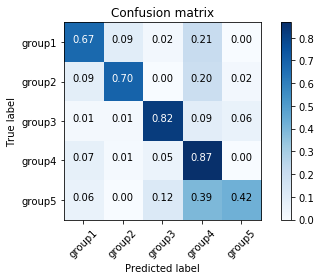

In [43]:
cnf_matrix = confusion_matrix(y_real, y_predict,labels=[0, 1, 2,3,4])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['group1', 'group2', 'group3','group4','group5'],
                          normalize=True,title='Confusion matrix')
plt.savefig('./figures/confusion_mat_MLP.png', dpi=300)

# CNN 이용한 분류

In [2]:
from tensorflow.python.keras.models import *
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.utils import *
from tensorflow.python.keras import *
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import *
import pandas as pd
import numpy as np
cluster = pd.read_csv('C:/Users/wnduq/Desktop/label.csv',encoding = 'euc-kr', index_col = 'Unnamed: 0')

In [3]:
data = pd.read_csv('./data_male_full_30sec_fig_2.csv',encoding = 'euc-kr',index_col = 'Unnamed: 0')
singer = data['0.1']
singer.to_csv('./label.csv',encoding='euc-kr')
label = []
for i in singer:
    for j in cluster['0']:
        if i == j:
            val = list(cluster[cluster['0']==j]['1'])
            label.append(val[0])
label = np.array(label)
LE = LabelEncoder()
y_label = to_categorical(LE.fit_transform(label))

In [3]:
data.shape

(1920, 96041)

In [4]:
data.iloc[:,:96000].to_pickle('./for_scaling.pickle')

## scaling

In [4]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data.iloc[:,:96000])
data = scale.transform(data.iloc[:,:96000])

## pickle로 저장후 빠른 로드

In [46]:
data = pd.read_pickle('./data_pic.pickle')

In [47]:
singer = pd.read_csv('./label.csv',encoding='euc-kr',index_col='Unnamed: 0')
label = []
for i in singer['0']:
    for j in cluster['0']:
        if i == j:
            val = list(cluster[cluster['0']==j]['1'])
            label.append(val[0])
label = np.array(label)
LE = LabelEncoder()
y_label = to_categorical(LE.fit_transform(label))

## set분할

In [48]:
X = data
x_train, x_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3, random_state = 100)
x_train = np.array(x_train)
x_test = np.array(x_test)

In [49]:
x_train.shape

(1344, 96000)

## 3개의 channel로 분할

In [50]:
num_rows = 200
num_cols = 160
num_cha = 3

x_train = x_train.reshape(x_train.shape[0], num_rows, num_cols, num_cha)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_cols, num_cha)

num_labels = y_train.shape[1]

In [6]:
x_train.shape

(1344, 200, 160, 3)

## VGG16 이용한 transfer learning

In [51]:
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.models import *

backend.clear_session()

VGG = VGG16(weights='imagenet', include_top=False,input_shape=(num_rows,num_cols,num_cha))
VGG.trainable =False
pre_model = Sequential()

pre_model.add(VGG)
pre_model.add(GlobalAveragePooling2D())
pre_model.add(Dense(100,activation = 'relu'))
pre_model.add(Dropout(0.3))
pre_model.add(Dense(5,activation = 'softmax'))

epochs = 500
batch_size = 50

checkpointer = ModelCheckpoint(filepath='./best_cnn_VGG.hdf5')
adam = optimizers.Adam(lr = 0.001)
pre_model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer=adam)
hist = pre_model.fit(x_train,y_train,batch_size=batch_size,
                         epochs =epochs, validation_split=0.1, verbose=1, callbacks = [checkpointer])

Train on 1209 samples, validate on 135 samples
Epoch 1/500
1209/1209 [==============================] - 31s 26ms/step - loss: 1.6290 - acc: 0.2936 - val_loss: 1.4757 - val_acc: 0.3481
Epoch 2/500
1209/1209 [==============================] - 30s 25ms/step - loss: 1.5032 - acc: 0.3664 - val_loss: 1.4651 - val_acc: 0.4148
Epoch 3/500
1209/1209 [==============================] - 31s 25ms/step - loss: 1.4558 - acc: 0.3954 - val_loss: 1.4470 - val_acc: 0.3926
Epoch 4/500
1209/1209 [==============================] - 31s 25ms/step - loss: 1.4308 - acc: 0.4053 - val_loss: 1.4080 - val_acc: 0.4370
Epoch 5/500
1209/1209 [==============================] - 31s 26ms/step - loss: 1.4169 - acc: 0.4111 - val_loss: 1.3969 - val_acc: 0.4519
Epoch 6/500
1209/1209 [==============================] - 31s 26ms/step - loss: 1.3980 - acc: 0.4235 - val_loss: 1.3931 - val_acc: 0.4519
Epoch 7/500
1209/1209 [==============================] - 31s 26ms/step - loss: 1.3934 - acc: 0.4202 - val_loss: 1.3842 - val_acc: 0

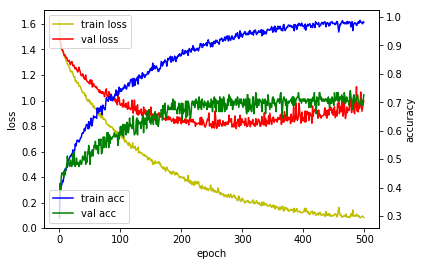

In [52]:
import matplotlib.pyplot as plt

fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['acc'],'b',label='train acc')
acc_ax.plot(hist.history['val_acc'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.savefig('./figures/CNN_hist',dpi=300)
plt.show()

In [53]:
pre_model.save('./models/singer_model_VGG')

In [56]:
print('test_정확도 : ' + str(pre_model.evaluate(x_test,y_test)[1]))

576/576 [==============================] - 11s 20ms/step
test_정확도 : 0.6927083333333334


## 저장된 모델 복구와 평가

In [6]:
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.models import *

backend.clear_session()

#set_architecture
VGG = VGG16(weights='imagenet', include_top=False,input_shape=(num_rows,num_cols,num_cha))
VGG.trainable =False
pre_model = Sequential()

pre_model.add(VGG)
pre_model.add(GlobalAveragePooling2D())
pre_model.add(Dense(100))
pre_model.add(Dropout(0.3))
pre_model.add(Dense(5,activation = 'softmax'))
adam = optimizers.Adam(lr = 0.001)
pre_model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer=adam)

# load_weight
pre_model.load_weights('C:/Users/wnduq/Desktop/Python_code/voicepro/best_cnn_VGG.hdf5')
loss,acc = pre_model.evaluate(x_test,  y_test, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

복원된 모델의 정확도: 56.77%


In [57]:
y_predict = pre_model.predict_classes(x_test)
y_real = np.argmax(y_test, axis=1)

## Confusion matrix

Normalized confusion matrix
[[0.51 0.12 0.09 0.25 0.03]
 [0.03 0.7  0.07 0.15 0.05]
 [0.05 0.02 0.75 0.13 0.06]
 [0.04 0.07 0.08 0.78 0.02]
 [0.05 0.11 0.18 0.16 0.51]]


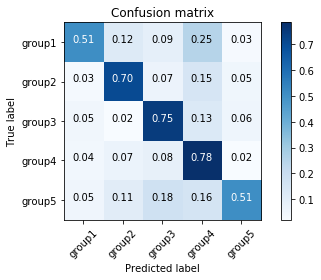

In [58]:
from sklearn.metrics import *


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_real, y_predict,labels=[0, 1, 2,3,4])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['group1', 'group2', 'group3','group4','group5'],
                          normalize=True,title='Confusion matrix')
plt.savefig('confusion_mat_VGG.png', dpi=300)

# 입렵값에 대한 분류